##### Streaming data visualization:  

i. For   the   incoming   climate   data   plot   the   line   graph   of   air   temperature  against   arrival   time.   You   need   to   label   some   interesting   points   such  as maximum and minimum values.  

In [1]:
####IMPORTANT### : You might want to restart your kafka server for consistent data or you can uncomment 
# auto_offset_reset='earliest', on line 39 below
# please run the TaskC_Producer1 to have the data come in

## CODE BELOW FROM WEEK 12 TUTORIAL

# import statements
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib.pyplot as plt
import json
#from json import loads
import statistics


topic = 'TaskC'

def annotate_max(x, y, ax = None):
    ymax = max(y)
    xpos = y.index(ymax)
    xmax = x[xpos]
    text = 'Max: Time={}, Value={}'.format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    ax.annotate(text, xy=(xmax, ymax), xytext=(xmax, ymax+5), arrowprops=dict(facecolor='red', shrink=0.05),)
    
def annotate_min(x, y, ax = None):
    ymin = min(y)
    xpos = y.index(ymin)
    xmin = x[xpos]
    text = 'Min: Time={}, Value={}'.format(xmin, ymin)
    if not ax:
        ax=plt.gca()
    ax.annotate(text, xy=(xmin, ymin), xytext=(xmin, ymin+5), arrowprops=dict(facecolor='orange', shrink=0.05),)

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=10000, # stop iteration if no message after 10 sec
#                                    auto_offset_reset='earliest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['localhost:9092'],
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

<IPython.core.display.Javascript object>


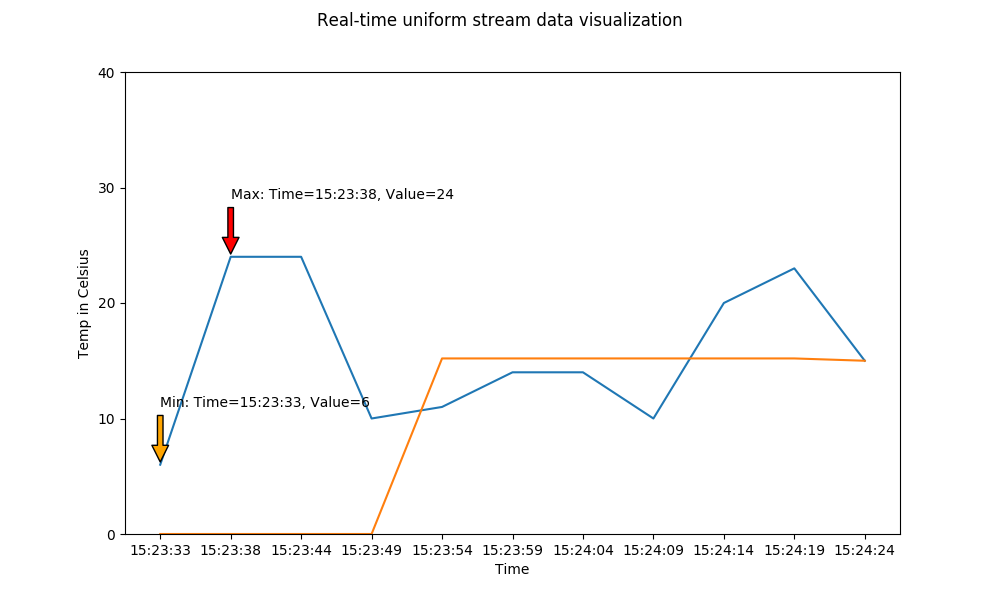

Waiting for messages
waiting for more than 10 data points..... 1 of 10  goes in:
waiting for more than 10 data points..... 2 of 10  goes in:
waiting for more than 10 data points..... 3 of 10  goes in:
waiting for more than 10 data points..... 4 of 10  goes in:
waiting for more than 10 data points..... 5 of 10  goes in:
waiting for more than 10 data points..... 6 of 10  goes in:
waiting for more than 10 data points..... 7 of 10  goes in:
waiting for more than 10 data points..... 8 of 10  goes in:
waiting for more than 10 data points..... 9 of 10  goes in:
waiting for more than 10 data points..... 10 of 10  goes in:


KeyboardInterrupt: 

In [2]:

# Please run the producers first
# this line is needed for the inline display of graphs in Jupyter Notebook
# stop if you want to run the next part
%matplotlib notebook
plt.rcParams.update({'font.size': 10})
def init_plots():
    try:
        width = 10
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Real-time uniform stream data visualization') # giving figure a title
        ax.set_xlabel('Time')
        ax.set_ylabel('Temp in Celsius')
        ax.set_ylim(0,40) 
        ax.set_yticks([0,10,20,30,40])
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))
    
def consume_messages(consumer, fig, ax):
    try:
        # container for x and y values
        x, y, y2 = [], [], []
        check = 0
        print('Waiting for messages')
        for message in consumer:
            data = message.value.decode('utf-8')
            data = data.replace("'", "\"")
            data = json.loads(data)
#             print(data)
            #{'sender_id': 1, 
            #'data': {'air_temp': '12', 'lon': '142.524', 'relative_humid': '47.3', 'prep': ' 0.02G', 'max_wind_speed': '14', 'lat': '-36.834', 'windspeed': '9.7'}, 
            #'created_time': '13:00:15'}
            #'''
            if data['sender_id'] == 1:
                
                x.append(str(dt.datetime.strptime(data['created_time'],"%Y-%m-%dT%H:%M:%S").strftime("%X"))) 
                y.append(int(data['data']['air_temp']))
            
            # print(y)
            
                if len(y) > 5:
                    y2.append(statistics.mean(y[:5]))
                else:
                    y2.append(0)

                # we start plotting only when we have 10 data points
                if len(y) > 10:
#                     print('ploting...')
                    ax.clear()
                    ax.plot(x, y)
                    ax.plot(x, y2)
                    ax.set_xlabel('Time')
                    ax.set_ylabel('Temp in Celsius')
                    ax.set_ylim(0,40) 
                    ax.set_yticks([0,10,20,30,40])
                    annotate_max(x, y, ax)
                    annotate_min(x, y, ax)
                    fig.canvas.draw()
                    x.pop(0) # removing the item in the first position
                    y.pop(0)
                    y2.pop(0)
                else:
                    print("waiting for more than 10 data points.....",len(y), "of 10  goes in:")
#                 if len(y) == 10:
#                     print("HERE IT COMES!")

            #'''
            
        plt.close('all')
    except Exception as ex:
        print(str(ex))
    
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()
    consume_messages(consumer, fig, ax)
    
    
    
    

#### Static   data   visualization:   
Write   python   programs   using   pymongo   to   get  the   data   from   the   MongoDB   collection(s)   created   in   Task   C.2   and   perform  the following visualizations. 

i. Records   with   the   top   10   number   of   fires.   Plot   a   bar   chart   with   time  as the x-axis and number of fires as the y-axis.  

In [3]:
from pymongo import MongoClient
from pprint import pprint
import pymongo

client = MongoClient()

db = client.fit5148_assignment_db
hotspotdb = db.hotspot
# joindb = db.join
climatedb = db.climate

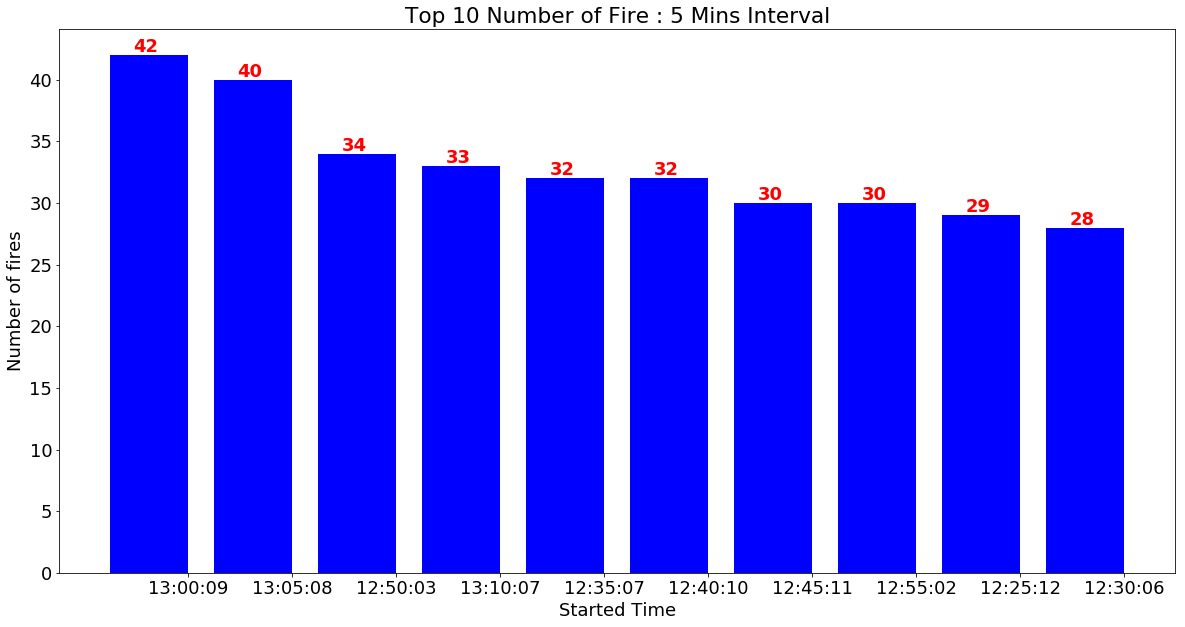

In [18]:
# find top 10 fire within 2 mins interval in the static database
# make sure you have enough hotspot data in the collection by running the app
from bson.son import SON

top_10 = hotspotdb.aggregate([
    
        {
        "$match": {
            "created_time": { "$exists": "true", "$ne": "null" } #eliminate those that doesn't have the created_time
        }},
    
    {"$project":{

        "created_time": 1, #starting time of the interval
        "interval" :{ "$subtract":[
                {"$minute":"$created_time"},
                {"$mod":[{"$minute":"$created_time"}, 5]} #interval 5 mins
            ]}
    }},
    {"$group":{
     "_id" : {"interval" : "$interval"},
        "total_fire": { "$sum": 1 },
        "created_time": { "$first": "$created_time"},
    
    }},
    {"$sort": {"total_fire": -1}},
    {"$limit": 10} #top 10 fire
    
])

#### Plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = []
y= []
for doc in top_10:
    x.append(doc['created_time'].strftime("%X"))
    y.append(doc['total_fire'])
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(figsize=(20,10))    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.bar(ind, y, width, color="blue")
ax.set_xticks(ind+width/2)
ax.set_xticklabels(x,ha='center', minor=False)
plt.title('Top 10 Number of Fire : 5 Mins Interval')
plt.xlabel('Started Time')
plt.ylabel('Number of fires')  
for i, v in enumerate(y):
    ax.text(i - 0.15 , v+.25  , str(v), color='red', fontweight='bold')
plt.show()

ii. Plot   fire   locations   in   the   map   with   air   temperature,   surface  temperature,   relative   humidity   and   confidence.   See   the   example  below. 

In [5]:
# Make sure to install these packages before running (Uncomment to install):
# !pip3 install gmplot

In [6]:
#create the dictionary for climate data to join the data with the hotspot later
climdict = {}
for each in climatedb.find():
    if 'location' in each:
        keyy = (each['location']['latitude'], each['location']['longitude'])
        climdict[keyy] = [each['relative_humidity'], each['air_temperature_celsius']]
    #pprint(each)

In [11]:
#joining hotspot with climate data

hotlist = []
#atc = 0
#rh = 0
for row in hotspotdb.find():
    # Checking if the parking spot is available
    if 'id' in row.keys():
        lat = row['location']['latitude']
        lon = row['location']['longitude']
        st = row['surface_temperature_celsius']
        con = row['confidence']
        loc = (lat,lon)
        if loc in climdict:
            atc = climdict[loc][1]
            rh = climdict[loc][0]
            # Adding the latitude and longitude to the list of unoccupied spots
            hotlist.append((float(lat), float(lon), str('surface temp: ' + str(st) + ', confidence: ' + str(con) + ', air temp: ' + str(atc) + ', relative humidity: ' + str(rh))))
            #print(str(atc))
            #print(str(rh))
            
        else:
            hotlist.append((float(lat), float(lon), str('surface temp: ' + str(st) + ', confidence: ' + str(con))))

In [12]:
#check the number of locations we're going plot on the map
len(hotlist)

322

In [13]:
import webbrowser

In [14]:
import gmplot
# gmplot contains a simple wrapper around 
# Google’s geocoding service enabling map initilization to the location of your choice.
# latitude and longitude of melbourne city, which the records are centered on
gmap = gmplot.GoogleMapPlotter(float(-37.812015244225677), float(144.951471202974), 7) 

In [15]:
# Plotting the points on the map
for row in hotlist:
    gmap.marker(row[0], row[1], title=row[2])

In [16]:
# Drawing the map
gmap.draw('firelocations.html')

In [17]:
webbrowser.open_new("firelocations.html")

True

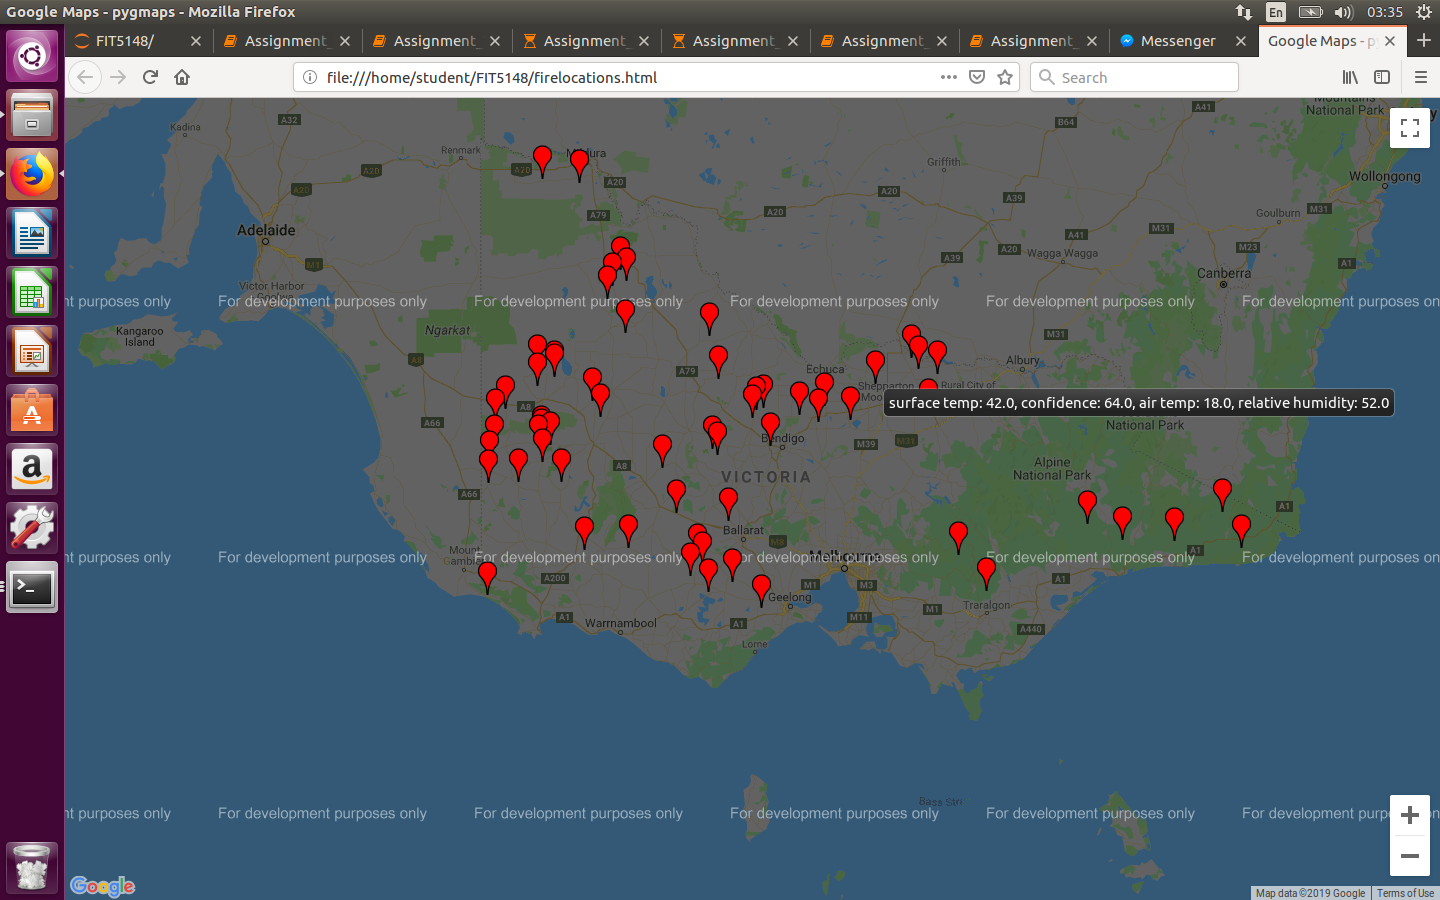